# Data science project from scratch

## London Python Sprints

## Today goals

**1.** Have fun, meet new people, and eat free pizza (thanks JP Morgan)

**2.** Learn new things:

_"Write clean and maintainable production-level code, including tests; the tech stack includes: Python, GIT, Azure, SQL"_, from an actual job description

_"Python syntax is probably 20% of what you need to be a Python programmer"_, myself :)

We will learn about:

- _Programming principles_
- _API design_
- Dependencies
- Unit testing
- Documentation
- Linting
- Continuous Integration
- Benchmarks

**3.** Create a new Python open source project

Topic: **Bayesian A/B testing framework**

## 3 Programming principles

_There are only two kinds of developers in this world._

_One is a good developer with good habits and the other one is a good developer with bad habits._

## Principle 1: Divide and conquer

Computer science is not the science of dealing with computers, it's the art of dealing with complexity.

Any non-trivial problem is too complex to be solved properly. It needs to be divided as much as needed until it's trivial.

![](img/io_system.svg.png)

![](img/lego.jpeg)

Building a lego **giraffe** does not require knowing how a lego **block** is made.

![](img/lego_zoo.jpeg)

Building a lego **zoo** does not require knowing how the **giraffe** is made.

## Principle 2: Readability counts

_Any developer can do a program that a computer understands._

_Only good developers do programs that a human understands._

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


We **read** code MUCH more often than we **write**

**Python**'s main strength is **readability**

In [ ]:
# Javascript:

var fruits = new Array("apple", "banana", "coconut");
if (!(fruits.indexOf("melon") > 0)) { console.log("it is missing!"); }

# Python

fruits = ['apple', 'banana', 'coconut']
if 'melon' not in fruits: print('it is missing!')

## Principle 3: Make mistakes faster

aka _"be Agile"_

![](img/fail.jpeg)

Very well thought and planned project:

![](img/non_agile.svg.png)

Making mistakes fast (and learning from them)

![](img/agile.svg.png)

In some cases you even know that you are making mistakes, but they can be worth.

Things that you know can be improved is called **technical debt**.

Two development tasks:

- Build new features
- Refactoring (addressing technical debt)

## Bayesian A/B testing

A/B testing

- We have a **repeating** experiment
- There are two **variants**
- Each of them having a different **conversion** rate (number of times the experiment is succeful)
- The conversion rates are **initially unknown**

In [16]:
%matplotlib inline

import matplotlib

matplotlib.rcParams.update({'font.size': 18, 'figure.figsize': (12, 5)})

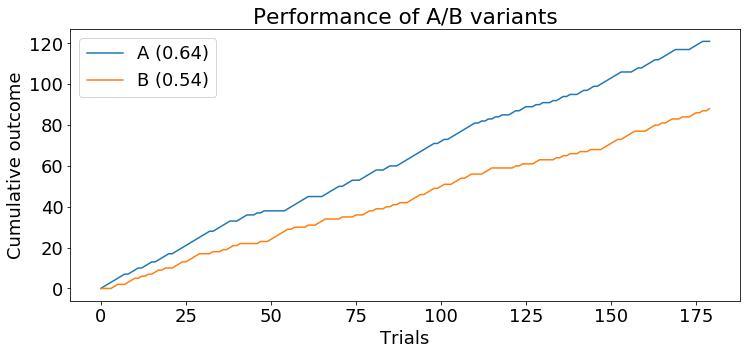

In [47]:
import random; random.seed(123456789)
import scipy.stats
from matplotlib import pyplot

conversion_a, conversion_b, cum_a, cum_b, show_trials = random.random(), random.random(), [0], [0], 180

for trial in range(1000):
    cum_a.append(cum_a[-1] + scipy.stats.bernoulli.rvs(conversion_a))
    cum_b.append(cum_b[-1] + scipy.stats.bernoulli.rvs(conversion_b))

pyplot.title('Performance of A/B variants'); pyplot.xlabel('Trials'); pyplot.ylabel('Cumulative outcome')
pyplot.plot(cum_a[:show_trials], label=f'A ({conversion_a:.2f})'); pyplot.plot(cum_b[:show_trials], label=f'B ({conversion_b:.2f})')
pyplot.legend();

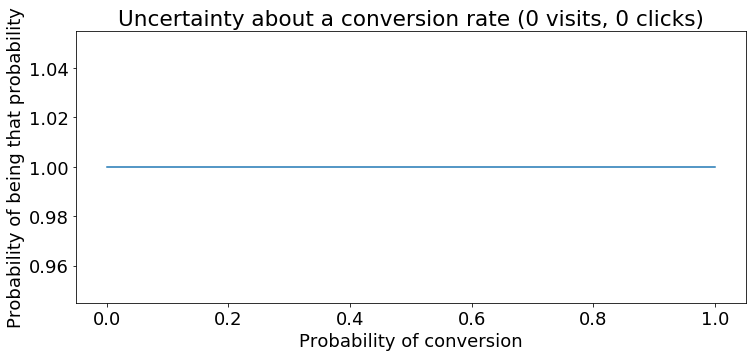

In [7]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = numpy.linspace(0., 1., 1001)
y = scipy.stats.beta.pdf(x, 1, 1)
pyplot.title('Uncertainty about a conversion rate (0 visits, 0 clicks)')
pyplot.xlabel('Probability of conversion'); pyplot.ylabel('Probability of being that probability')
pyplot.plot(x, y);

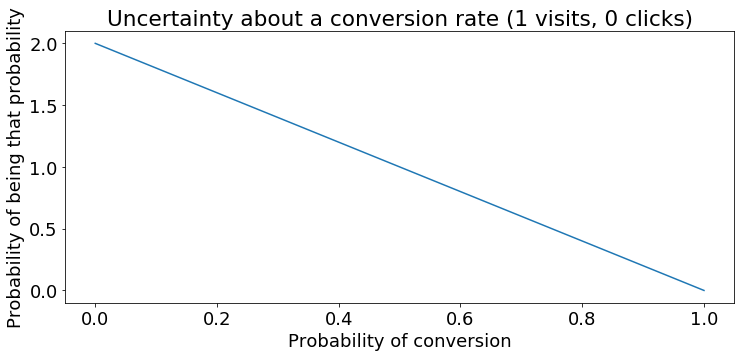

In [48]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = numpy.linspace(0., 1., 1001)
y = scipy.stats.beta.pdf(x, 1, 2)
pyplot.title('Uncertainty about a conversion rate (1 visit, 0 clicks)')
pyplot.xlabel('Probability of conversion'); pyplot.ylabel('Probability of being that probability')
pyplot.plot(x, y);

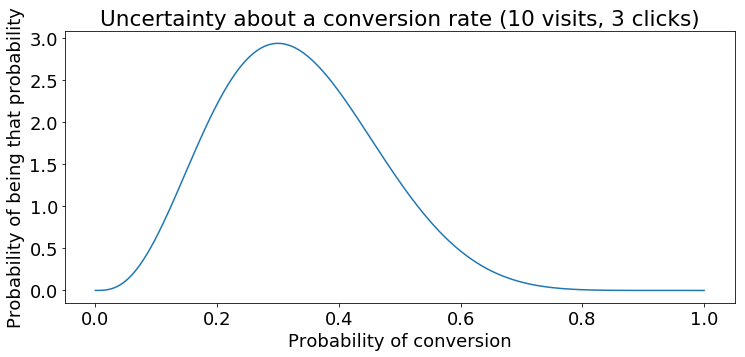

In [52]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = numpy.linspace(0., 1., 1001)
y = scipy.stats.beta.pdf(x, 4, 8)
pyplot.title('Uncertainty about a conversion rate (10 visits, 3 clicks)')
pyplot.xlabel('Probability of conversion'); pyplot.ylabel('Probability of being that probability')
pyplot.plot(x, y);

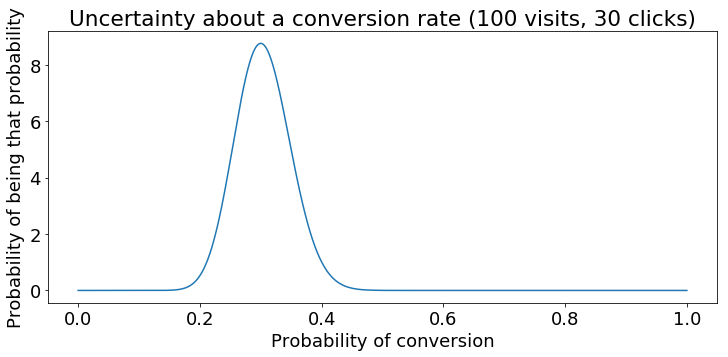

In [53]:
import numpy
import scipy.stats
from matplotlib import pyplot

x = numpy.linspace(0., 1., 1001)
y = scipy.stats.beta.pdf(x, 31, 71)
pyplot.title('Uncertainty about a conversion rate (100 visits, 30 clicks)')
pyplot.xlabel('Probability of conversion'); pyplot.ylabel('Probability of being that probability')
pyplot.plot(x, y);

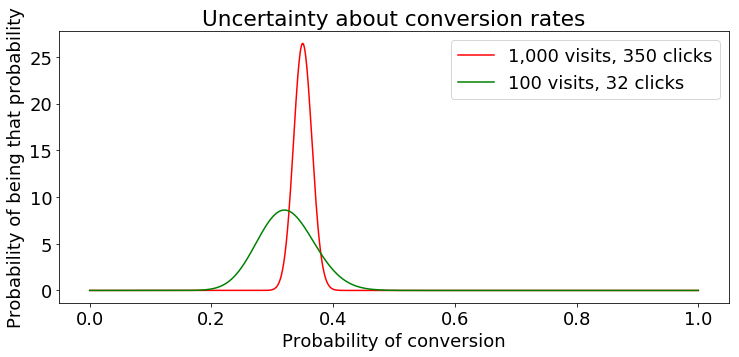

In [63]:
x = numpy.linspace(0., 1., 1001)
y_a = scipy.stats.beta.pdf(x, 351, 651)
y_b = scipy.stats.beta.pdf(x, 33, 69)
pyplot.title('Uncertainty about conversion rates')
pyplot.xlabel('Probability of conversion'); pyplot.ylabel('Probability of being that probability')
pyplot.plot(x, y_a, color='r', label='1,000 visits, 350 clicks')
pyplot.plot(x, y_b, color='g', label='100 visits, 32 clicks')
pyplot.legend();

Thompson sampling:
- Model with _beta_ distributions our variants
- Generate samples from both of them
- Chose the variant with the highest sample for the next experiment

## API design

Before we write the code, we need to decide our API: how users will interact with our program:

- Inputs we need
- Outputs we will return
- Which of the Python machinery (functions, classes, context managers, decorators...) will make users code more readable
- Naming

In [ ]:
# Example 1

import bayesian_ab_testing

for trial in range(1_000):
    next_variant = bayesian_ab_testing.thompson_sampling(wins_a,
                                                         trials_a,
                                                         wins_b,
                                                         trials_b)
    if next_variant == 'a':
        trials_a += 1
        wins_a = 1 if run_experiment_a() else 0
    elif next_variant == 'b':
        trials_b += 1
        wins_b = 1 if run_experiment_b() else 0

In [ ]:
# Example 2

import thompson

sampler = thompson.Sampler(run_experiment_a,
                           run_experiment_b)

for trial in sampler:
    print(f'A: {sampler[0].wins} wins out of {sampler[1].trials} trials')

## Summary

- Have fun, meet new people and learn (more important than finishing the "assignment")
- Don't solve non-trivial problems, divide until they are trivial
- Make your code is as readable as possible (more important that whether it works or not)
- Don't overthink, make mistakes and learn from them

Implement a Bayesian A/B testing framework. Groups:
1. Creation of the repository, merging of PRs and unit tests
2. Source code
3. Documentation
4. Continuous Integration and dependencies
5. README file, badges, linting and benchmarks

**All the code needs to be reviewed by at 2 people (from any team) before being merged.**